In [16]:
#!pip freeze > ../requirements.txt

In [2]:
import pandas as pd
import matplotlib.pyplot as plt                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
from sklearn.feature_extraction.text import CountVectorizer
plt.style.use('seaborn')                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
from wordcloud import WordCloud
from lexicalrichness import LexicalRichness

In [2]:
"""
Lexicon source is (C) 2016 National Research Council Canada (NRC) 
and library is for research purposes only.  
Source: http://sentiment.nrc.ca/lex                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             icons-for-research/
"""
lexicon = pd.read_csv('./data/pt-nrc-lexicon.csv', sep=';', encoding='utf-8')

In [85]:
df = pd.read_csv('./data/clean_lyrics.csv')
df.head()

,id,title,artist,composer,album,year,lyric,decade,clean_lyric,unique_words,words
0,2360,João Teimoso,Marília Batista,Noel Rosa / Marilia Batista.,Poeta da Vila,1953,Tenho mais o que fazer Não discuto com teimoso...,50,discuto teimoso perder precioso viver joão tei...,"{'nome', 'cismo', 'dorme', 'cara', 'fome', 'co...","['discuto', 'teimoso', 'perder', 'precioso', '..."
1,2361,Morena Sereia,Marília Batista,José Maria De Abreu 1936 / Noel Rosa.,Poeta da Vila,1953,Morena sereia Que à beira-mar não passeia Que ...,50,morena sereia beiramar passeia senta praia dei...,"{'nome', 'cheia', 'nomes', 'beiramar', 'espera...","['morena', 'sereia', 'beiramar', 'passeia', 's..."
2,2362,"Parabéns, Guanabara",Jackson do Pandeiro,NaN,Jackson do Pandeiro - 1955,1955,"Rio, querida Guanabara Eu sou gente também Ace...",50,rio querida guanabara gente aceito parabéns pa...,"{'céu', 'apertar', 'adoram', 'noel', 'brasilei...","['rio', 'querida', 'guanabara', 'gente', 'acei..."
3,2363,O Bom Xaxador,Jackson do Pandeiro,NaN,Jackson do Pandeiro - 1955,1955,Depois do baião foi que veio o forró Depois do...,50,baião veio forró forró veio rojão pisada chão ...,"{'forró', 'chão', 'rojão', 'mostrar', 'pisada'...","['baião', 'veio', 'forró', 'forró', 'veio', 'r..."
4,2364,Cheguei Agora,Jackson do Pandeiro,NaN,Jackson do Pandeiro - 1955,1955,Beira mar beira do rio Ê ê beira mar Cheguei a...,50,beira mar beira rio beira mar cheguei beira ma...,"{'beira', 'coco', 'planta', 'candomblé', 'cant...","['beira', 'mar', 'beira', 'rio', 'beira', 'mar..."


### Núvem de palavras (BOW) dos termos mais frequentes durante as décadas

In [64]:
cv = CountVectorizer()
lyrics_cv = cv.fit_transform(df['unique_words'].iloc[:])

df_cv = pd.DataFrame(lyrics_cv.toarray(), columns=cv.get_feature_names_out())

In [65]:
df_cv['decade'] = df['decade']
vect_words = df_cv.groupby('decade').sum().T
vect_words = vect_words.reset_index(level=0).rename(columns ={'index':'words', 0: '2000', 10:'2010', 
                                                              20:'2020', 50:'1950', 60:'1960', 
                                                              70:'1970', 80:'1980', 90:'1990'})
vect_words = vect_words.rename_axis(columns='')

In [66]:
vect_words.to_csv('./data/vect_words.csv', index=False)
vect_words = pd.read_csv('./data/vect_words.csv')

In [67]:
vect_words

,words,2000,2010,2020,1950,1960,1970,1980,1990
0,aba,0,0,0,0,1,0,0,0
1,abacate,0,0,0,0,1,0,0,0
2,abacateiro,0,0,0,1,0,0,0,0
3,abacaxi,0,0,0,1,0,1,0,1
4,abaeté,0,0,0,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...
29438,úmido,0,0,0,0,0,0,0,1
29439,única,5,3,0,0,1,3,0,6
29440,único,5,5,0,0,1,2,2,2
29441,útero,0,0,0,0,0,1,0,0


In [68]:
def plot_wordcloud(df, row, col):
    wc = WordCloud(background_color="white",
                     max_font_size=100,
                     random_state=15)
    plt.figure(figsize=(20,10))
     
    for index, value in enumerate(df.columns[1:]):
      top_dict = dict(zip(df['words'].tolist(),
                        df[value].tolist()))
      wc.generate_from_frequencies(top_dict)
      plt.subplot(row,col,index+1)
      plt.imshow(wc,interpolation="bilinear")
      plt.axis("off")
      plt.title(f"{value}",fontsize=15)
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()
plt.savefig('./data/BOG.png', bbox_inches='tight')

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

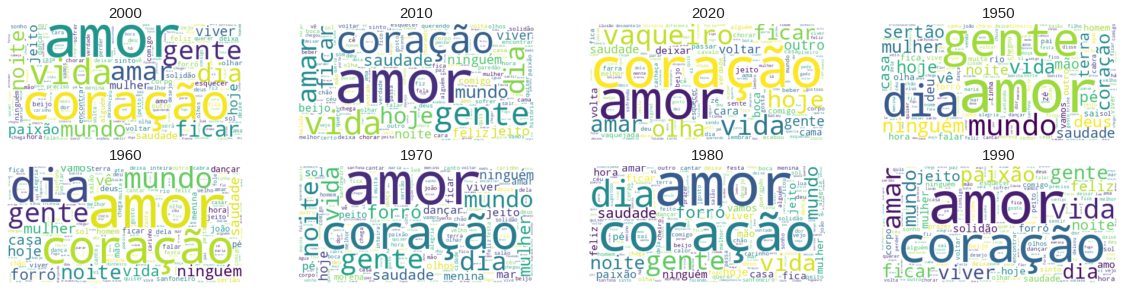

In [69]:
plot_wordcloud(vect_words, 4, 4)

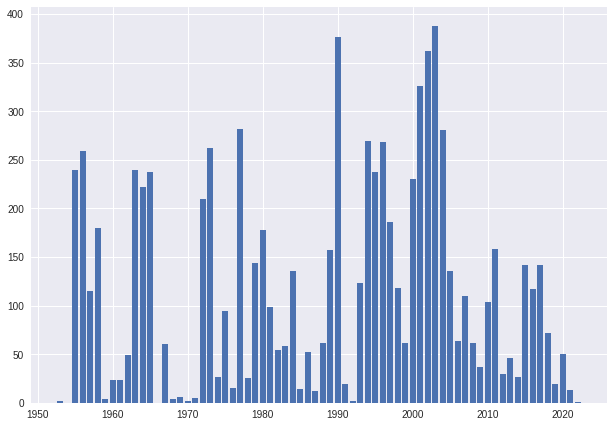

In [70]:
#quantidade de músicas por ano
df_hist = df.groupby(['year'])['title'].count().reset_index().rename(columns={'year': 'year', 'title':'songs'})
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
years = df_hist['year'].to_list()
song_count = df_hist['songs']
ax.bar(years, song_count)
plt.show()

### Cálculo da Riqueza Léxica

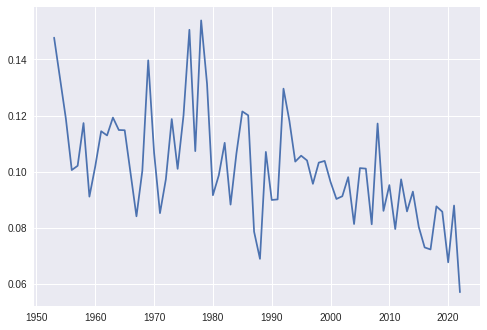

In [99]:
# type-token ratio (TTR) of text - TAXA DO TIPO DE TOKEN.
df['TTR'] = [LexicalRichness((' ').join(lyric)).ttr
 for _, lyric in enumerate(df['words'])]

df_ttr = df.groupby(['year'])['TTR'].mean().reset_index()

x1 = df_ttr['year'].to_list()
y1 = df_ttr['TTR'].to_list()
# plotting the line 1 points 
plt.plot(x1, y1, label = "line 1")

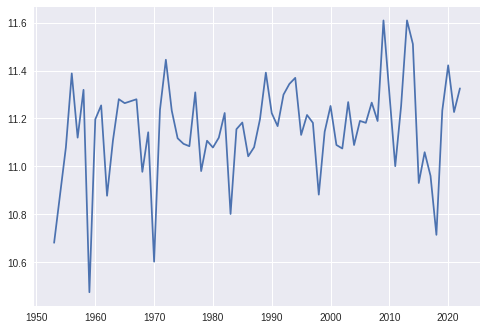

In [100]:
# Return Measure of Textual Lexical Diversity (MTLD) - MEDIDA DE RETORNO DA DIVERDADE LEXICAL DO TEXTO.
df['MTLD'] = [LexicalRichness((' ').join(lyric)).mtld(threshold=0.72)
 for _, lyric in enumerate(df['words'])]

df_ttr = df.groupby(['year'])['MTLD'].mean().reset_index()

x1 = df_ttr['year'].to_list()
y1 = df_ttr['MTLD'].to_list()
# plotting the line 1 points 
plt.plot(x1, y1, label = "line 1")

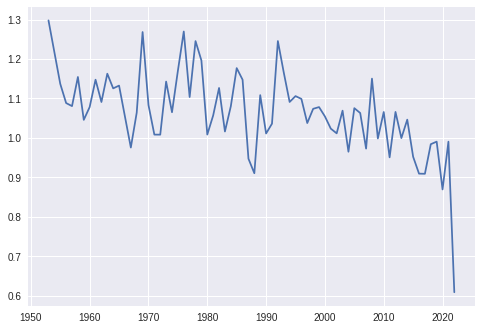

In [101]:
# Return corrected type-token ratio (CTTR) of text - PROPORÇÃO CORRIGIDA DO TIPO DE TOKEN.
df['CTTR'] = [LexicalRichness((' ').join(lyric)).cttr
 for _, lyric in enumerate(df['words'])]

df_ttr = df.groupby(['year'])['CTTR'].mean().reset_index()

x1 = df_ttr['year'].to_list()
y1 = df_ttr['CTTR'].to_list()
# plotting the line 1 points 
plt.plot(x1, y1, label = "line 1")

# Análise de sentimentos

In [74]:
from LeIA.leia import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [102]:
df['polarity_scores'] = df['clean_lyric'].apply(sid.polarity_scores)
df.head()

,id,title,artist,composer,album,year,lyric,decade,clean_lyric,unique_words,words,MTLD,CTTR,TTR,polarity_scores
0,2360,João Teimoso,Marília Batista,Noel Rosa / Marilia Batista.,Poeta da Vila,1953,Tenho mais o que fazer Não discuto com teimoso...,50,discuto teimoso perder precioso viver joão tei...,"{'nome', 'cismo', 'dorme', 'cara', 'fome', 'co...","['discuto', 'teimoso', 'perder', 'precioso', '...",10.497312,1.364382,0.169231,"{'neg': 0.399, 'neu': 0.503, 'pos': 0.098, 'co..."
1,2361,Morena Sereia,Marília Batista,José Maria De Abreu 1936 / Noel Rosa.,Poeta da Vila,1953,Morena sereia Que à beira-mar não passeia Que ...,50,morena sereia beiramar passeia senta praia dei...,"{'nome', 'cheia', 'nomes', 'beiramar', 'espera...","['morena', 'sereia', 'beiramar', 'passeia', 's...",10.866013,1.231174,0.126316,"{'neg': 0.0, 'neu': 0.843, 'pos': 0.157, 'comp..."
2,2362,"Parabéns, Guanabara",Jackson do Pandeiro,NaN,Jackson do Pandeiro - 1955,1955,"Rio, querida Guanabara Eu sou gente também Ace...",50,rio querida guanabara gente aceito parabéns pa...,"{'céu', 'apertar', 'adoram', 'noel', 'brasilei...","['rio', 'querida', 'guanabara', 'gente', 'acei...",11.885714,1.172604,0.125000,"{'neg': 0.072, 'neu': 0.543, 'pos': 0.385, 'co..."
3,2363,O Bom Xaxador,Jackson do Pandeiro,NaN,Jackson do Pandeiro - 1955,1955,Depois do baião foi que veio o forró Depois do...,50,baião veio forró forró veio rojão pisada chão ...,"{'forró', 'chão', 'rojão', 'mostrar', 'pisada'...","['baião', 'veio', 'forró', 'forró', 'veio', 'r...",8.712121,1.343503,0.190000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,2364,Cheguei Agora,Jackson do Pandeiro,NaN,Jackson do Pandeiro - 1955,1955,Beira mar beira do rio Ê ê beira mar Cheguei a...,50,beira mar beira rio beira mar cheguei beira ma...,"{'beira', 'coco', 'planta', 'candomblé', 'cant...","['beira', 'mar', 'beira', 'rio', 'beira', 'mar...",9.195586,1.149069,0.125749,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [76]:
# Using friedman's super smoother from 1984
#!pip install supersmoother
from supersmoother import SuperSmoother, LinearSmoother

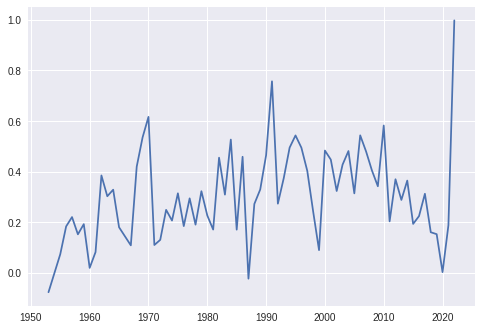

In [77]:
df['score'] = [polarity['compound'] for _, polarity in enumerate(df['polarity_scores'])]
df_sentiment = df.groupby(['year'])['score'].mean().reset_index()

x1 = df_sentiment['year'].to_list()
y1 = df_sentiment['score'].to_list()

plt.plot(x1, y1, label="line 1")
#plt.savefig('./data/sentiment_trend.png', bbox_inches='tight')

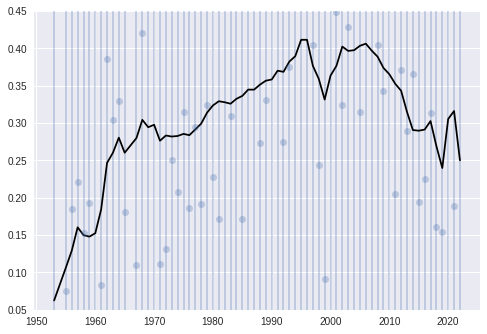

In [132]:
t = df_sentiment['year'].to_list()
y = df_sentiment['score'].to_list()
dy = t

model = SuperSmoother()
model.fit(t, y, dy)

tfit = df_sentiment['year'].to_list()
yfit = model.predict(tfit)

plt.errorbar(t, y, dy, fmt='o', alpha=0.3)
plt.ylim(0.05, 0.45)
plt.axhline(y=0, color='r', linestyle='--')
plt.plot(tfit, yfit, '-k')
plt.savefig('./data/sentiment_trend_smoothed.png', bbox_inches='tight')

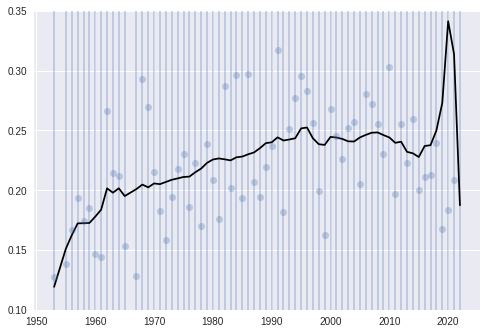

In [128]:
df['score_pos'] = [polarity['pos'] for _, polarity in enumerate(df['polarity_scores'])]

df_sentiment_pos = df.groupby(['year'])['score_pos'].mean().reset_index()

x = df_sentiment_pos['year'].to_list()
y = df_sentiment_pos['score_pos'].to_list()
dy = x

model = SuperSmoother()
model.fit(x, y, dy)

t_fit = df_sentiment_pos['year'].to_list()
yfit = model.predict(t_fit)

plt.errorbar(x, y, dy, fmt='o', alpha=0.3)
plt.ylim(0.1, 0.35)
plt.axhline(y=0, color='r', linestyle='--')
plt.plot(t_fit, yfit, '-k')
plt.savefig('./data/sentiment_trend_pos.png', bbox_inches='tight')


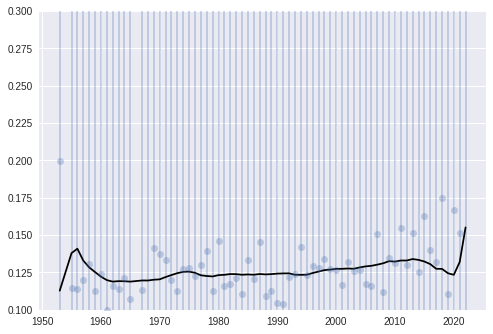

In [133]:
df['score_neg'] = [polarity['neg'] for _, polarity in enumerate(df['polarity_scores'])]

df_sentiment_neg = df.groupby(['year'])['score_neg'].mean().reset_index()

x = df_sentiment_neg['year'].to_list()
y = df_sentiment_neg['score_neg'].to_list()
dy = x

model = SuperSmoother()
model.fit(x, y, dy)

t_fit = df_sentiment_neg['year'].to_list()
yfit = model.predict(t_fit)

plt.errorbar(x, y, dy, fmt='o', alpha=0.3)
plt.ylim(0.1, 0.3)
plt.axhline(y=0, color='r', linestyle='--')
plt.plot(t_fit, yfit, '-k')
plt.savefig('./data/sentiment_trend_neg.png', bbox_inches='tight')

### Comparando resultados

In [109]:
#media
df_sentiment_pos['mean'] = df_sentiment_pos['score_pos'].mean()
#desvio padrao
df_sentiment_pos['std'] = df_sentiment_pos['score_pos'].std()

df_sentiment_pos['z-score_pos'] = (df_sentiment_pos['score_pos'] - df_sentiment_pos['mean'] / df_sentiment_pos['std'])


In [110]:
#media
df_sentiment_neg['mean'] = df_sentiment_neg['score_neg'].mean()
#desvio padrao
df_sentiment_neg['std'] = df_sentiment_neg['score_neg'].std()

df_sentiment_neg['z-score_neg'] = (df_sentiment_neg['score_neg'] - df_sentiment_neg['mean'] / df_sentiment_neg['std'])


In [111]:
#uniao das medidas positivas e negativas
df_sentiment_score = df_sentiment_pos.merge(df_sentiment_neg, on='year')

In [112]:
df_sentiment_score['difference'] = df_sentiment_score['z-score_pos']-df_sentiment_score['z-score_neg']

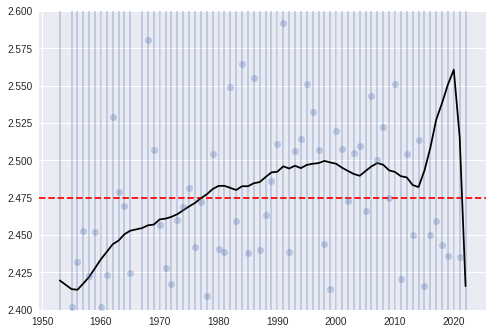

In [135]:
# Using supersmoother
t = df_sentiment_score['year'].to_list()
y = df_sentiment_score['difference'].to_list()
dy = t

# fit the supersmoother model
model = SuperSmoother()
model.fit(t, y, dy)

# find the smoothed fit to the data
tfit = df_sentiment_score['year'].to_list()
yfit = model.predict(tfit)

# Show the smoothed model of the data
plt.errorbar(t, y, dy, fmt='o', alpha=0.3)
plt.ylim(2.4, 2.6)
plt.axhline(y=2.475, color='r', linestyle='--')
plt.plot(tfit, yfit, '-k')